## Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [79]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [23]:
dataset = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

In [24]:
dataset.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [26]:
# Column rename.

dataset= dataset.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [27]:
dataset.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Step 3: Data preprocessing

In [9]:
# not going to falloe EDA step here since it is already done in link1.(Above cell)
# as we know ID & award will not make much contribution during clutering. we will drop both columns.

dataset1 =  dataset.drop(['ID','Award'], axis=1)
dataset1.head(2)


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


##standardization¶


In [10]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(dataset1)      # this will used for kmeans
std_df.shape

(3999, 10)

## MinMaxScalar

In [11]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(dataset1)
minmax_df.shape

(3999, 10)

## Step 4: PCA

In [12]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [13]:
# eigenvalues..

print(pca_std.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [14]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[30.50115845 17.27406665 10.5087073  10.07979485  9.60188179  9.05617078
  6.71532505  3.62968484]


In [15]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

## Conclusion:

by applying PCA on standardized data with 95% variance it gives 8 PCA components.

## 4.2 Running PCA of MinMaxscalar data

In [16]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [17]:
# eigenvalues..

print(pca_minmax.singular_values_)

[23.30644253 14.98078096  6.73641543  4.71018421  4.35528647]


In [18]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[60.47067269 24.98398618  5.05185116  2.46983879  2.11167109]


## Conclusion:

By applying PCA on MinMaxscalr transformation data gives 5 PCA components.

## Step 5: KMeans Clustering.


## 5.1.1 How many numbers of cluster. Also deciding which transformation data we will use to build model.

model1


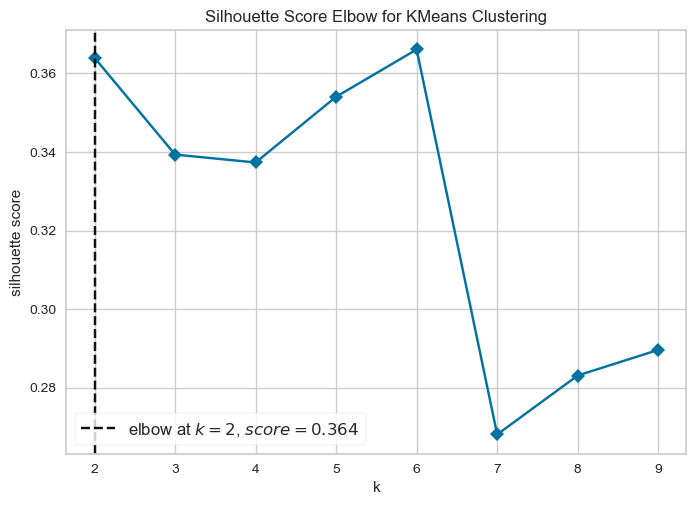

model2


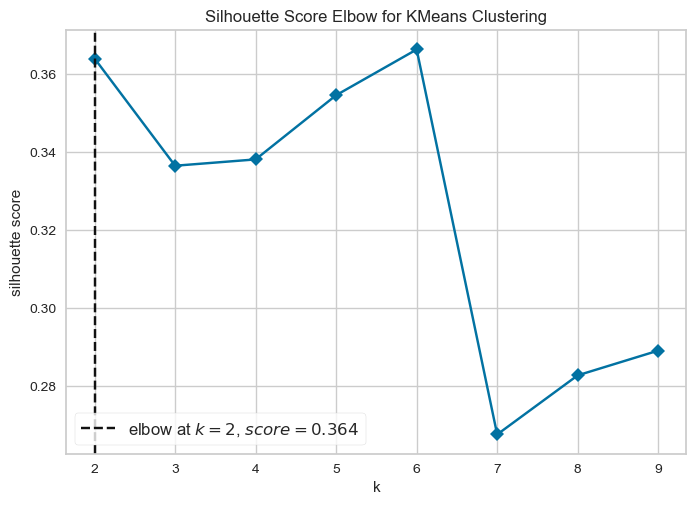

In [35]:
# Install the required library
!pip install yellowbrick

# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd

# Assuming pca_std_df is your input data (replace it with your actual data)
# Also, make sure to have the required data preprocessing steps before clustering
# For example, scaling your data using StandardScaler.

# Assuming pca_std_df is a pandas DataFrame
# Replace it with your actual data
# Make sure to handle missing values, if any
# Also, you need to import the necessary libraries for PCA and data preprocessing

# For example:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# pca_std_df = scaler.fit_transform(your_actual_data)

# Instantiate KMeans models
model1 = KMeans(random_state=0)
model2 = KMeans(random_state=10, max_iter=500, n_init=20)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=(2, 10), metric='silhouette', timings=False)
visualizer2 = KElbowVisualizer(model2, k=(2, 10), metric='silhouette', timings=False)

# Fit the data and visualize for model1
print('model1')
visualizer1.fit(pca_std_df)    
visualizer1.poof()
plt.show()

# Fit the data and visualize for model2
print('model2')
visualizer2.fit(pca_std_df)    
visualizer2.poof()
plt.show()


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming pca_std_df is your input data (replace it with your actual data)
# Also, make sure to have the required data preprocessing steps before clustering
# For example, scaling your data using StandardScaler.

# Assuming pca_std_df is a pandas DataFrame
# Replace it with your actual data
# Make sure to handle missing values, if any
# Also, you need to import the necessary libraries for PCA and data preprocessing

# For example:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# pca_std_df = scaler.fit_transform(your_actual_data)

list1 = [2, 3, 4, 5, 6, 7, 8, 9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1 = silhouette_score(pca_std_df, cluster_labels1)
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {sil_score1}')


Number of clusters: 2, Silhouette Score: 0.36397881678961763
Number of clusters: 3, Silhouette Score: 0.3393430103388893
Number of clusters: 4, Silhouette Score: 0.3373347358381812
Number of clusters: 5, Silhouette Score: 0.35406472254791954
Number of clusters: 6, Silhouette Score: 0.36610037126824996
Number of clusters: 7, Silhouette Score: 0.26810128168771696
Number of clusters: 8, Silhouette Score: 0.28310928094594917
Number of clusters: 9, Silhouette Score: 0.2896292830978856


model3


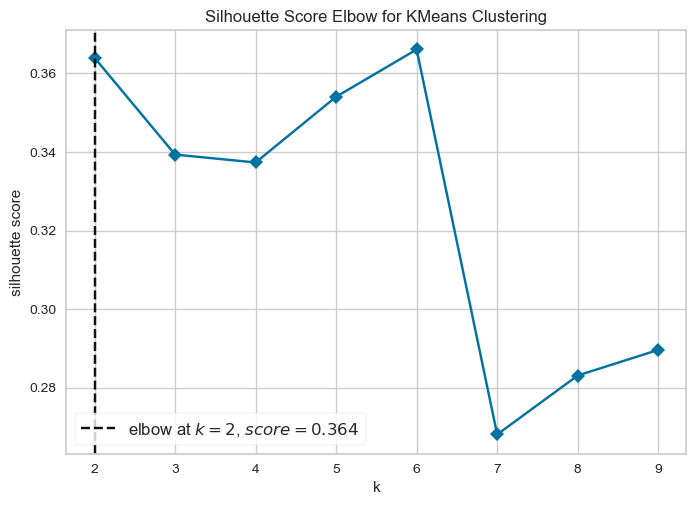

model4


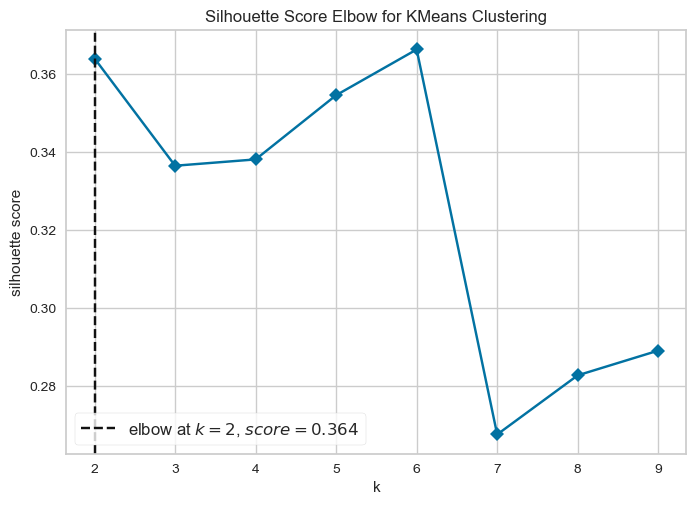

In [39]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd

# Assuming pca_std_df is your input data (replace it with your actual data)
# Also, make sure to have the required data preprocessing steps before clustering
# For example, scaling your data using StandardScaler.

# Assuming pca_std_df is a pandas DataFrame
# Replace it with your actual data
# Make sure to handle missing values, if any
# Also, you need to import the necessary libraries for PCA and data preprocessing

# For example:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# pca_std_df = scaler.fit_transform(your_actual_data)

# Instantiate KMeans models
model3 = KMeans(random_state=0)
model4 = KMeans(random_state=10, max_iter=500, n_init=20)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer3 = KElbowVisualizer(model3, k=(2, 10), metric='silhouette', timings=False)
visualizer4 = KElbowVisualizer(model4, k=(2, 10), metric='silhouette', timings=False)

# Fit the data and visualize for model3
print('model3')
visualizer3.fit(pca_std_df)    
visualizer3.poof()
plt.show()

# Fit the data and visualize for model4
print('model4')
visualizer4.fit(pca_std_df)    
visualizer4.poof()
plt.show()


In [41]:
## model2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming pca_std_df is your input data (replace it with your actual data)
# Also, make sure to have the required data preprocessing steps before clustering
# For example, scaling your data using StandardScaler.

# Assuming pca_std_df is a pandas DataFrame
# Replace it with your actual data
# Make sure to handle missing values, if any
# Also, you need to import the necessary libraries for PCA and data preprocessing

# For example:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# pca_std_df = scaler.fit_transform(your_actual_data)

list1 = [2, 3, 4, 5, 6, 7, 8, 9]  # always start number from 2.

for n_clusters in list1:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels2 = clusterer2.fit_predict(pca_std_df)
    sil_score2 = silhouette_score(pca_std_df, cluster_labels2)
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {sil_score2}')


Number of clusters: 2, Silhouette Score: 0.36397881678961763
Number of clusters: 3, Silhouette Score: 0.3393430103388893
Number of clusters: 4, Silhouette Score: 0.3373347358381812
Number of clusters: 5, Silhouette Score: 0.35406472254791954
Number of clusters: 6, Silhouette Score: 0.36610037126824996
Number of clusters: 7, Silhouette Score: 0.26810128168771696
Number of clusters: 8, Silhouette Score: 0.28310928094594917
Number of clusters: 9, Silhouette Score: 0.2896292830978856


## 5.1.2 Run K-Means:

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming pca_std_df is your input data (replace it with your actual data)
# Also, make sure to have the required data preprocessing steps before clustering
# For example, scaling your data using StandardScaler.

# Assuming pca_std_df is a pandas DataFrame
# Replace it with your actual data
# Make sure to handle missing values, if any
# Also, you need to import the necessary libraries for PCA and data preprocessing

# For example:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# pca_std_df = scaler.fit_transform(your_actual_data)

# Model building using the chosen number of clusters
model1 = KMeans(n_clusters=6, random_state=0)
y_predict1 = model1.fit_predict(pca_std_df)
print(y_predict1.shape)

# Evaluate silhouette score
sil_score1 = silhouette_score(pca_std_df, y_predict1)
print(f'Silhouette Score: {sil_score1}')


(3999,)
Silhouette Score: 0.36610037126824996


In [44]:

y_predict1

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
model1.labels_


array([0, 0, 0, ..., 0, 0, 0])

In [46]:
# cluster centres associated with each lables

model1.cluster_centers_

array([[-1.04566981e+00,  2.62893297e-01, -1.69236338e-02,
        -8.59157738e-02, -5.22349728e-02,  1.43189598e-01,
         5.52394408e-02,  1.38895703e-03],
       [ 1.39019974e+00, -1.00482408e+00, -7.60909828e-02,
         9.41955488e-02, -2.55784255e-01, -2.51248701e-01,
        -6.86126999e-02, -1.83908027e-02],
       [ 4.35245436e+00, -3.63296061e+00,  8.67825558e+00,
        -7.27101378e+00,  7.22379804e+00,  6.82996771e+00,
         1.09780252e-01, -3.57742407e-01],
       [ 4.76675141e-02,  1.06794180e+00,  3.90187367e+00,
         7.28531492e+00,  3.55053601e+00, -6.82561937e-01,
         2.01781543e-01,  2.39276034e-01],
       [ 4.22422340e+00,  4.07622197e+00,  1.37463788e-01,
        -2.04191722e-01, -6.13873290e-01,  5.13427680e-01,
        -4.97945201e-02,  1.19765871e-01],
       [ 1.00930830e+00,  1.64553073e+00, -3.00204858e+00,
        -1.50525621e+00,  4.87613963e+00, -2.83327858e+00,
        -8.15524057e-01, -2.42368955e-02]])

In [47]:
model1.inertia_

16718.29936240568

In [48]:
model1.score(pca_std_df) 

-16718.29936240568

In [49]:
model1.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 'warn',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

## 5.1.3 visualizing silhoutte score..for different cluster


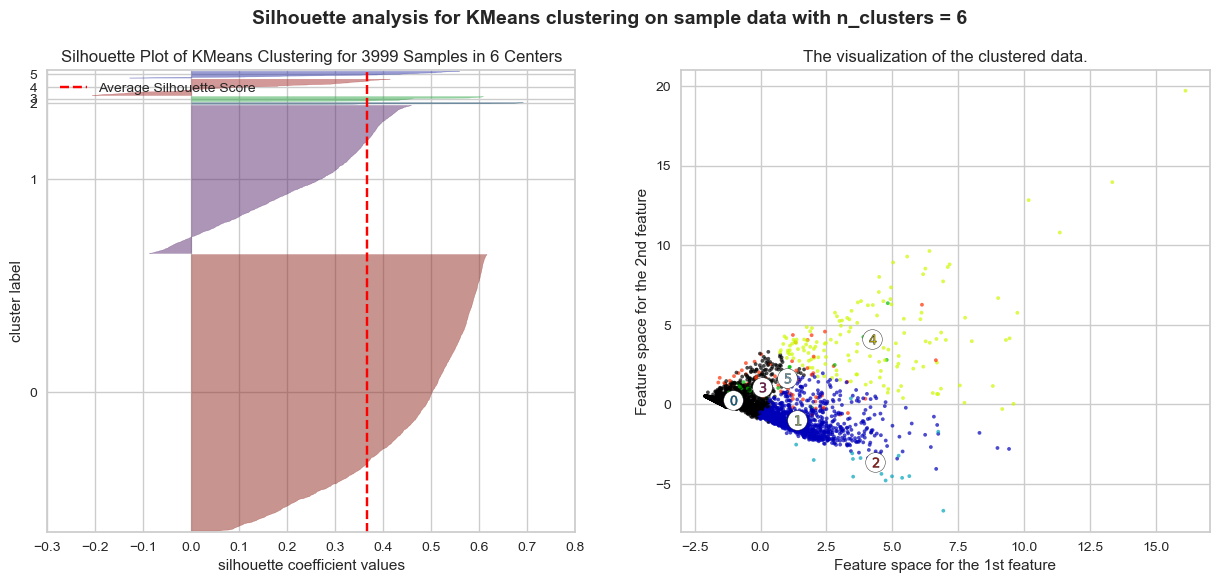

In [50]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model1,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(pca_std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model1.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(pca_std_df[:, 0], pca_std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')
# Labeling the clusters
centers1 = model1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

## 5.1.4 Putting Cluster lables into original dataset And analysis of the same.

In [51]:
model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [52]:
Kmeans_df = pd.concat([dataset.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


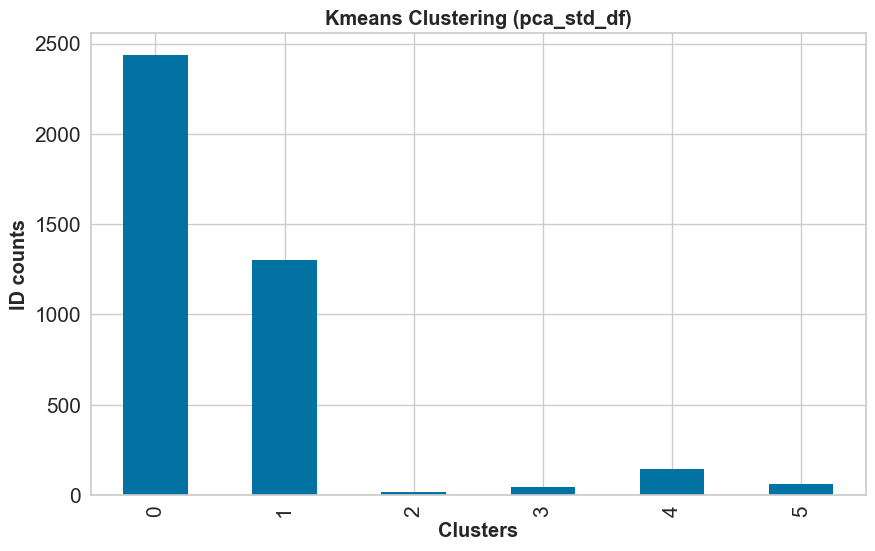

In [53]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


## Step 6: Hierarchical Clustering Algorithm

In [54]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = silhouette_score(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.3139605594950568
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8258402005485836
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8258402005485836
For n_clusters = 2 The average silhouette_score with linkage- single : 0.7595573832017464

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3099513555846738
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7965798717740986
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7965798717740986
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7592925058168964

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.32824819737813127
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6569044547102614
For n_clusters = 4 The average silhouette_score with linkage- average : 0.6940154925011895
For 

In [55]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = silhouette_score(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.45263516644787444
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.585780896047594
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5003973034034864
For n_clusters = 2 The average silhouette_score with linkage- single : 0.6061073734453644

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3739125364654645
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.4542833655116026
For n_clusters = 3 The average silhouette_score with linkage- average : 0.45064261018788887
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5029366855064075

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.36547786997315546
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.45615471007123654
For n_clusters = 4 The average silhouette_score with linkage- average : 0.39465688584567465
F

In [56]:
## Run Hierarchical Clustering.(Agglomerative Clustering)

In [57]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
# Cluster numbers

agg_clustering.n_clusters_

5

In [59]:
agg_clustering.n_leaves_

3999

In [60]:
agg_clustering.n_connected_components_

1

In [61]:
# The children of each non-leaf node. Values less than n_samples correspond to leaves of 
#......the tree which are the original samples. A node i greater than or equal to n_samples 
#.........is a non-leaf node and has children children_[i - n_samples]. Alternatively at the 
#...........i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i

agg_clustering.children_

array([[3370, 3876],
       [1826, 2121],
       [2678, 2679],
       ...,
       [7991, 7993],
       [7986, 7994],
       [7988, 7995]])

In [72]:
# Clustering Score

(silhouette_score(pca_std_df, agg_clustering.labels_)*100).round(3)

66.804

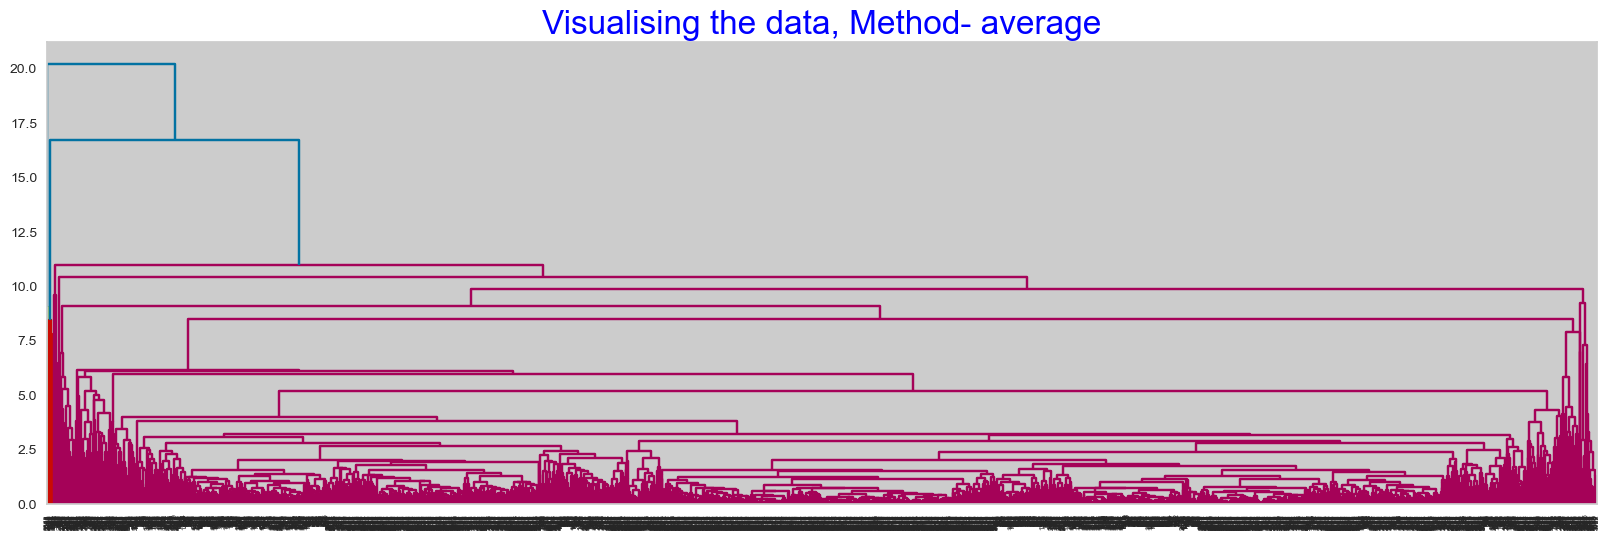

In [64]:
# Plotting Dendrogram.

import scipy.cluster.hierarchy as shc
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False))


## 6.4 Putting Cluster lables into original dataset And analysis of the same.

In [65]:
# Creating dataframe of cluster lables..

hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [66]:
# Concating model1_Cluster df with main dataset copy

hie_df = pd.concat([dataset.copy(), hie_cluster], axis=1)
hie_df .head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hie_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


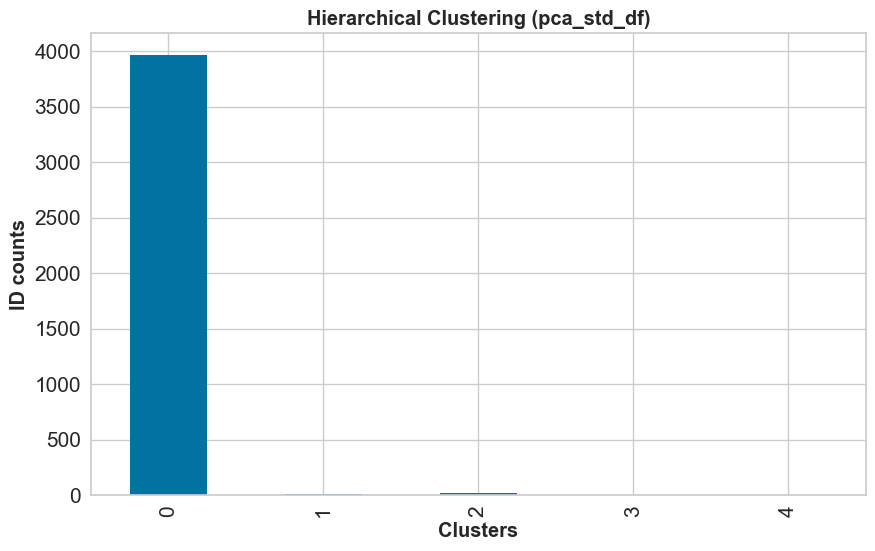

In [67]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

## Step 7: Conclusion Between Kmeans & Hierarchical¶


In [69]:
Kmeans_df.groupby(['Kmeans_Clustering']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,,
0,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436
1,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
2,15,15,15,15,15,15,15,15,15,15,15,15
3,43,43,43,43,43,43,43,43,43,43,43,43
4,143,143,143,143,143,143,143,143,143,143,143,143
5,59,59,59,59,59,59,59,59,59,59,59,59


In [70]:
hie_df.groupby(['Hie_Clustering']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Hie_Clustering,,,,,,,,,,,,
0,3965,3965,3965,3965,3965,3965,3965,3965,3965,3965,3965,3965
1,10,10,10,10,10,10,10,10,10,10,10,10
2,15,15,15,15,15,15,15,15,15,15,15,15
3,4,4,4,4,4,4,4,4,4,4,4,4
4,5,5,5,5,5,5,5,5,5,5,5,5


In [73]:
##Cluster Anlysis for Future Decision (Kmeans clustering)

In [74]:
# Groupby Cluster lables

count_df = Kmeans_df.groupby(['Kmeans_Clustering']).count()
count_df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,,
0,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436,2436
1,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
2,15,15,15,15,15,15,15,15,15,15,15,15
3,43,43,43,43,43,43,43,43,43,43,43,43
4,143,143,143,143,143,143,143,143,143,143,143,143
5,59,59,59,59,59,59,59,59,59,59,59,59


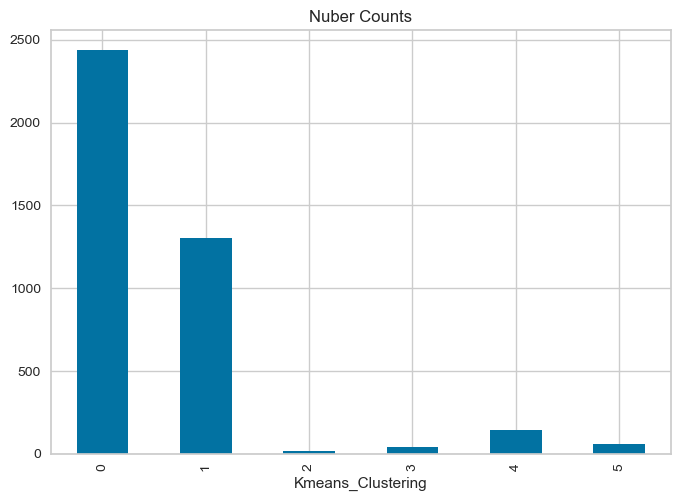

In [75]:
# Total numbers in each cluster..

count = count_df.xs('ID' ,axis = 1)
count.plot(kind='bar', title= 'Nuber Counts')
plt.show()